In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

soil_df = pd.read_csv("../AucklandMotatStationNiwa_08June24/SoilMoisture(20cm).csv", index_col='Date', parse_dates=True)
soil_df.head()

,SoilMoist(%)
Date,
2016-03-01,37.4
2016-03-01,37.6
2016-03-01,37.6
2016-03-01,37.7
2016-03-01,37.8


In [2]:
daily_soil = soil_df.groupby(level=0).mean()
daily_soil

,SoilMoist(%)
Date,
2016-03-01,37.562500
2016-03-02,37.183333
2016-03-03,36.862500
2016-03-04,36.625000
2016-03-05,36.387500
...,...
2023-03-24,36.070833
2023-03-25,35.954167
2023-03-26,35.791667


In [3]:
daily_soil

,SoilMoist(%)
Date,
2016-03-01,37.562500
2016-03-02,37.183333
2016-03-03,36.862500
2016-03-04,36.625000
2016-03-05,36.387500
...,...
2023-03-24,36.070833
2023-03-25,35.954167
2023-03-26,35.791667


In [4]:
daily_auckland_weather = pd.read_csv("../AucklandMotatStationNiwa_08June24/CombineDaily9am.csv", index_col='Date', parse_dates=True)
daily_auckland_weather.head()

,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),Tmax(c),Tmin(c),Tgmin(C),ET10©,ET20©,ET100©,Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg
Date,,,,,,,,,,,,,,,,,,,,
2016-03-01,188.0,1.2,65.0,7.2,172.0,1.8,19.2,18.5,93.0,22.4,18.4,18.4,21.3,22.2,21.5,1014.4,1012.5,1.3,6.21,20.40
2016-03-02,157.0,3.2,60.0,9.3,258.0,0.0,17.9,16.1,82.0,23.5,17.0,15.4,20.4,21.7,21.5,1019.3,1017.4,7.6,15.02,20.25
2016-03-03,134.0,1.9,67.0,10.8,214.0,0.0,18.3,15.7,75.0,23.1,15.3,12.6,19.5,20.9,21.5,1028.0,1026.1,9.4,20.46,19.20
2016-03-04,147.0,1.3,38.0,6.2,134.0,0.0,19.4,16.1,69.0,24.8,14.4,10.5,19.9,21.2,21.6,1027.6,1025.7,9.3,19.20,19.60
2016-03-05,131.0,0.4,197.0,9.3,187.0,0.0,19.0,17.3,84.0,25.6,13.9,9.9,19.9,21.2,21.5,1025.6,1023.7,12.1,24.18,19.75


In [5]:
evaporation = pd.read_csv("../AucklandMotatStationNiwa_08June24/Evaporation(open water).csv", index_col='Date', parse_dates=True)
evaporation.head()

,Evaporation(mm)
Date,
2016-03-01,0.9
2016-03-02,1.8
2016-03-03,4.2
2016-03-04,4.2
2016-03-05,4.0


In [6]:
weather_auckland = daily_auckland_weather.merge(evaporation, how='inner', left_index=True, right_index=True)
weather_auckland.head()

,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),Tmax(c),...,Tgmin(C),ET10©,ET20©,ET100©,Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg,Evaporation(mm)
Date,,,,,,,,,,,,,,,,,,,,,
2016-03-01,188.0,1.2,65.0,7.2,172.0,1.8,19.2,18.5,93.0,22.4,...,18.4,21.3,22.2,21.5,1014.4,1012.5,1.3,6.21,20.40,0.9
2016-03-02,157.0,3.2,60.0,9.3,258.0,0.0,17.9,16.1,82.0,23.5,...,15.4,20.4,21.7,21.5,1019.3,1017.4,7.6,15.02,20.25,1.8
2016-03-03,134.0,1.9,67.0,10.8,214.0,0.0,18.3,15.7,75.0,23.1,...,12.6,19.5,20.9,21.5,1028.0,1026.1,9.4,20.46,19.20,4.2
2016-03-04,147.0,1.3,38.0,6.2,134.0,0.0,19.4,16.1,69.0,24.8,...,10.5,19.9,21.2,21.6,1027.6,1025.7,9.3,19.20,19.60,4.2
2016-03-05,131.0,0.4,197.0,9.3,187.0,0.0,19.0,17.3,84.0,25.6,...,9.9,19.9,21.2,21.5,1025.6,1023.7,12.1,24.18,19.75,4.0


In [7]:
weather_auckland = weather_auckland.merge(daily_soil, how='outer', left_index=True, right_index=True)
weather_auckland.to_csv('../AucklandMotatStationNiwa_08June24/weather_auckland_2016_2024.csv')
weather_auckland.head()


,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),Tmax(c),...,ET10©,ET20©,ET100©,Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg,Evaporation(mm),SoilMoist(%)
Date,,,,,,,,,,,,,,,,,,,,,
2016-03-01,188.0,1.2,65.0,7.2,172.0,1.8,19.2,18.5,93.0,22.4,...,21.3,22.2,21.5,1014.4,1012.5,1.3,6.21,20.40,0.9,37.562500
2016-03-02,157.0,3.2,60.0,9.3,258.0,0.0,17.9,16.1,82.0,23.5,...,20.4,21.7,21.5,1019.3,1017.4,7.6,15.02,20.25,1.8,37.183333
2016-03-03,134.0,1.9,67.0,10.8,214.0,0.0,18.3,15.7,75.0,23.1,...,19.5,20.9,21.5,1028.0,1026.1,9.4,20.46,19.20,4.2,36.862500
2016-03-04,147.0,1.3,38.0,6.2,134.0,0.0,19.4,16.1,69.0,24.8,...,19.9,21.2,21.6,1027.6,1025.7,9.3,19.20,19.60,4.2,36.625000
2016-03-05,131.0,0.4,197.0,9.3,187.0,0.0,19.0,17.3,84.0,25.6,...,19.9,21.2,21.5,1025.6,1023.7,12.1,24.18,19.75,4.0,36.387500


In [8]:
weather_auckland.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2950 entries, 2016-03-01 to 2024-03-28
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   WDir(Deg)        2939 non-null   float64
 1   WSpd(m/s)        2939 non-null   float64
 2   GustDir(Deg)     2939 non-null   float64
 3   GustSpd(m/s)     2939 non-null   float64
 4   WindRun(Km)      2939 non-null   float64
 5   Rain(mm)         2939 non-null   float64
 6   Tdry(c)          2939 non-null   float64
 7   Twet(c)          2939 non-null   float64
 8   RH(%)            2939 non-null   float64
 9   Tmax(c)          2939 non-null   float64
 10  Tmin(c)          2939 non-null   float64
 11  Tgmin(C)         2939 non-null   float64
 12  ET10©            2939 non-null   float64
 13  ET20©            2939 non-null   float64
 14  ET100©           2939 non-null   float64
 15  Pmsl(hPa)        2939 non-null   float64
 16  Pstn(hPa)        2939 non-null   float64
 

In [9]:
weather_auckland.head()

,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),Tmax(c),...,ET10©,ET20©,ET100©,Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg,Evaporation(mm),SoilMoist(%)
Date,,,,,,,,,,,,,,,,,,,,,
2016-03-01,188.0,1.2,65.0,7.2,172.0,1.8,19.2,18.5,93.0,22.4,...,21.3,22.2,21.5,1014.4,1012.5,1.3,6.21,20.40,0.9,37.562500
2016-03-02,157.0,3.2,60.0,9.3,258.0,0.0,17.9,16.1,82.0,23.5,...,20.4,21.7,21.5,1019.3,1017.4,7.6,15.02,20.25,1.8,37.183333
2016-03-03,134.0,1.9,67.0,10.8,214.0,0.0,18.3,15.7,75.0,23.1,...,19.5,20.9,21.5,1028.0,1026.1,9.4,20.46,19.20,4.2,36.862500
2016-03-04,147.0,1.3,38.0,6.2,134.0,0.0,19.4,16.1,69.0,24.8,...,19.9,21.2,21.6,1027.6,1025.7,9.3,19.20,19.60,4.2,36.625000
2016-03-05,131.0,0.4,197.0,9.3,187.0,0.0,19.0,17.3,84.0,25.6,...,19.9,21.2,21.5,1025.6,1023.7,12.1,24.18,19.75,4.0,36.387500


In [10]:
# weather_auckland = weather_auckland.to_csv("../AucklandMotatStationNiwa_08June24/weather_auckland_2016_2024.csv", index=True)


In [11]:
weather_auckland = pd.read_csv('../AucklandMotatStationNiwa_08June24/weather_auckland_2016_2024.csv', parse_dates=True)
weather_auckland.head()

,Date,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),...,ET10©,ET20©,ET100©,Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg,Evaporation(mm),SoilMoist(%)
0,2016-03-01,188.0,1.2,65.0,7.2,172.0,1.8,19.2,18.5,93.0,...,21.3,22.2,21.5,1014.4,1012.5,1.3,6.21,20.40,0.9,37.562500
1,2016-03-02,157.0,3.2,60.0,9.3,258.0,0.0,17.9,16.1,82.0,...,20.4,21.7,21.5,1019.3,1017.4,7.6,15.02,20.25,1.8,37.183333
2,2016-03-03,134.0,1.9,67.0,10.8,214.0,0.0,18.3,15.7,75.0,...,19.5,20.9,21.5,1028.0,1026.1,9.4,20.46,19.20,4.2,36.862500
3,2016-03-04,147.0,1.3,38.0,6.2,134.0,0.0,19.4,16.1,69.0,...,19.9,21.2,21.6,1027.6,1025.7,9.3,19.20,19.60,4.2,36.625000
4,2016-03-05,131.0,0.4,197.0,9.3,187.0,0.0,19.0,17.3,84.0,...,19.9,21.2,21.5,1025.6,1023.7,12.1,24.18,19.75,4.0,36.387500


In [12]:
test_size_percentage = 0.30
test_size = int(len(weather_auckland) * test_size_percentage)

train_data = weather_auckland.iloc[:-test_size]
test_data = weather_auckland.iloc[-test_size:]
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Training data shape: (2065, 23)
Test data shape: (885, 23)


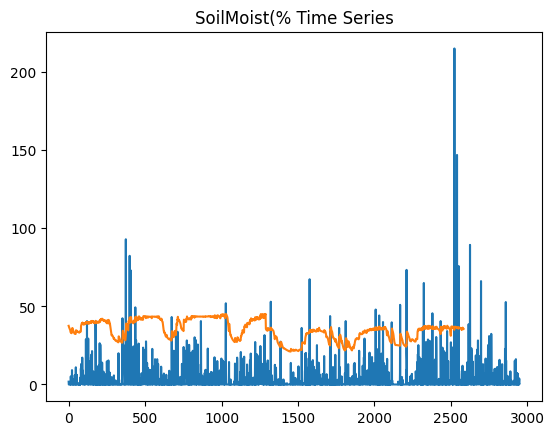

In [13]:
# Visual Inspection to choose between additive and multiplicative method for the Holt-Winters model
import matplotlib.pyplot as plt

weather_auckland['Rain(mm)'].plot(title='Rain(mm) Time Series')
weather_auckland['SoilMoist(%)'].plot(title='SoilMoist(% Time Series')
plt.show()

Typically, an additive model is used when seasonal fluctuations are roughly constant through the series, while a multiplicative model is used when seasonal fluctuations increase or decrease proportionally with the level of the series.

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Adding a small constant to handle zero or negative values
weather_auckland['Rain(mm)_pos'] = weather_auckland['Rain(mm)'] + 1e-6
weather_auckland['SoilMoist(%)_pos'] = weather_auckland['SoilMoist(%)'] + 1e-6

period = 365

# Decompose Rain(mm) time series
decomposition_add_rain = seasonal_decompose(weather_auckland['Rain(mm)'], model='additive', period=period)
decomposition_mul_rain = seasonal_decompose(weather_auckland['Rain(mm)_pos'], model='multiplicative', period=period)

# Decompose SoilMoist(%) time series
decomposition_add_soilmoist = seasonal_decompose(weather_auckland['SoilMoist(%)'], model='additive', period=period)
decomposition_mul_soilmoist = seasonal_decompose(weather_auckland['SoilMoist(%)_pos'], model='multiplicative', period=period)



ValueError: This function does not handle missing values

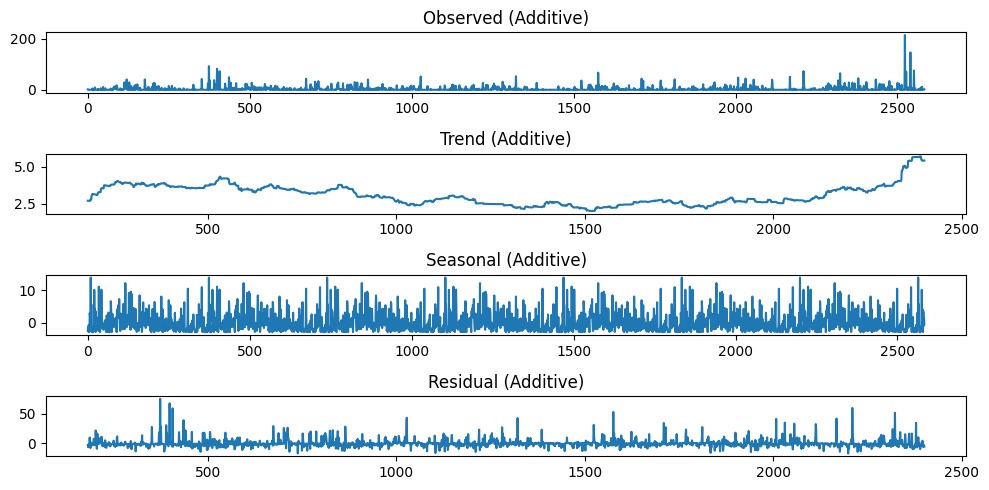

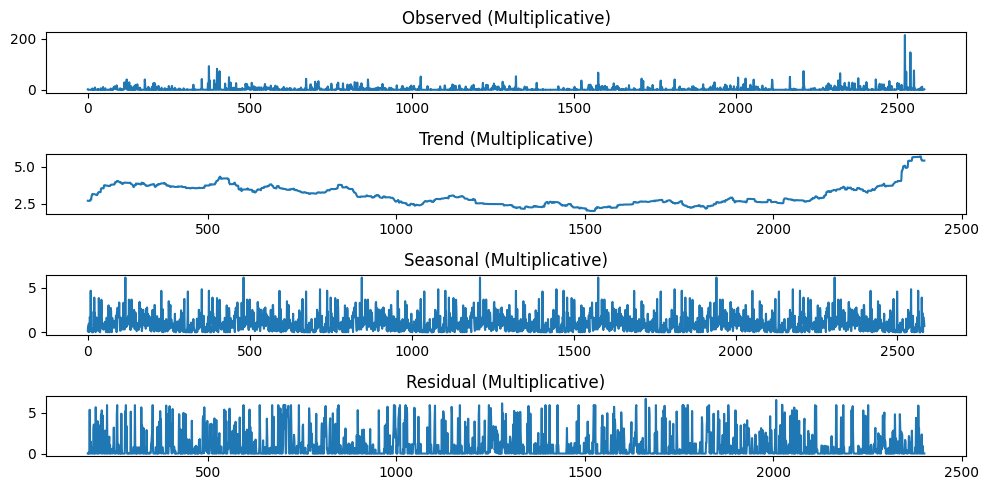

In [ ]:
# Plot Additive Decomposition for Rain(mm)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 5))
ax1.plot(decomposition_add_rain.observed)
ax1.set_title('Observed (Additive)')
ax2.plot(decomposition_add_rain.trend)
ax2.set_title('Trend (Additive)')
ax3.plot(decomposition_add_rain.seasonal)
ax3.set_title('Seasonal (Additive)')
ax4.plot(decomposition_add_rain.resid)
ax4.set_title('Residual (Additive)')
plt.tight_layout()
plt.show()

# Plot Multiplicative Decomposition for Rain(mm)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 5))
ax1.plot(decomposition_mul_rain.observed)
ax1.set_title('Observed (Multiplicative)')
ax2.plot(decomposition_mul_rain.trend)
ax2.set_title('Trend (Multiplicative)')
ax3.plot(decomposition_mul_rain.seasonal)
ax3.set_title('Seasonal (Multiplicative)')
ax4.plot(decomposition_mul_rain.resid)
ax4.set_title('Residual (Multiplicative)')
plt.tight_layout()
plt.show()

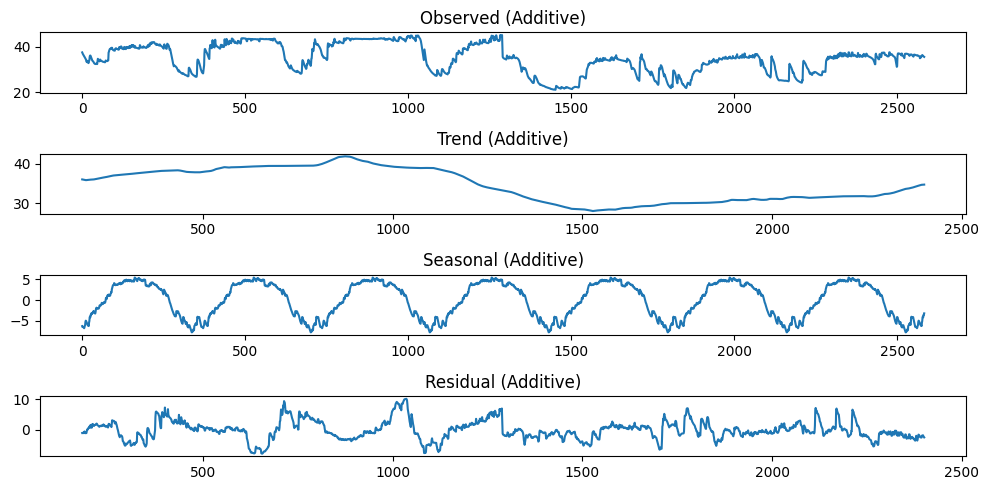

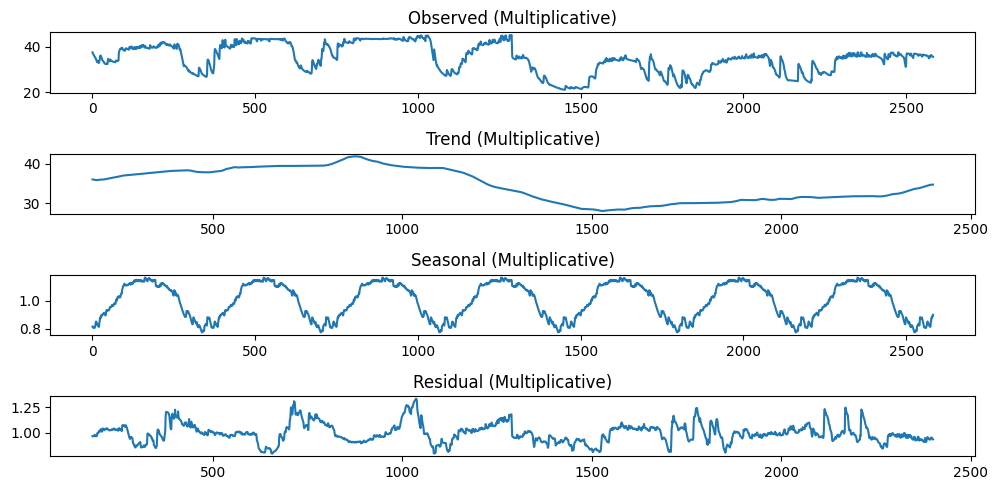

In [ ]:
# Plot Additive Decomposition for SoilMoist(%)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 5))
ax1.plot(decomposition_add_soilmoist.observed)
ax1.set_title('Observed (Additive)')
ax2.plot(decomposition_add_soilmoist.trend)
ax2.set_title('Trend (Additive)')
ax3.plot(decomposition_add_soilmoist.seasonal)
ax3.set_title('Seasonal (Additive)')
ax4.plot(decomposition_add_soilmoist.resid)
ax4.set_title('Residual (Additive)')
plt.tight_layout()
plt.show()

# Plot Multiplicative Decomposition for SoilMoist(%)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 5))
ax1.plot(decomposition_mul_soilmoist.observed)
ax1.set_title('Observed (Multiplicative)')
ax2.plot(decomposition_mul_soilmoist.trend)
ax2.set_title('Trend (Multiplicative)')
ax3.plot(decomposition_mul_soilmoist.seasonal)
ax3.set_title('Seasonal (Multiplicative)')
ax4.plot(decomposition_mul_soilmoist.resid)
ax4.set_title('Residual (Multiplicative)')
plt.tight_layout()
plt.show()

In [ ]:
# Print Additive Decomposition for Rain(mm)
print("Additive Decomposition for Rain(mm):")
print("Trend:")
print(decomposition_add_rain.trend.head())
print("\nSeasonal:")
print(decomposition_add_rain.seasonal.head())
print("\nResidual:")
print(decomposition_add_rain.resid.head())



Additive Decomposition for Rain(mm):
Trend:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: trend, dtype: float64

Seasonal:
0   -2.428365
1   -1.461698
2   -2.861607
3   -0.728273
4   -2.361607
Name: seasonal, dtype: float64

Residual:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: resid, dtype: float64


In [ ]:
# Print Multiplicative Decomposition for Rain(mm)
print("Multiplicative Decomposition for Rain(mm):")
print("Trend:")
print(decomposition_mul_rain.trend.head())
print("\nSeasonal:")
print(decomposition_mul_rain.seasonal.head())
print("\nResidual:")
print(decomposition_mul_rain.resid.head())

Multiplicative Decomposition for Rain(mm):
Trend:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: trend, dtype: float64

Seasonal:
0    0.210986
1    0.637456
2    0.032170
3    0.963638
4    0.257975
Name: seasonal, dtype: float64

Residual:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: resid, dtype: float64


In [ ]:
# Print Additive Decomposition for SoilMoist(%)
print("Additive Decomposition for SoilMoist(%):")
print("Trend:")
print(decomposition_add_soilmoist.trend.head())
print("\nSeasonal:")
print(decomposition_add_soilmoist.seasonal.head())
print("\nResidual:")
print(decomposition_add_soilmoist.resid.head())



Additive Decomposition for SoilMoist(%):
Trend:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: trend, dtype: float64

Seasonal:
0   -6.264350
1   -6.496637
2   -6.413600
3   -6.499287
4   -6.464104
Name: seasonal, dtype: float64

Residual:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: resid, dtype: float64


In [ ]:
print("Multiplicative Decomposition for SoilMoist(%):")
print("Trend:")
print(decomposition_mul_soilmoist.trend.head())
print("\nSeasonal:")
print(decomposition_mul_soilmoist.seasonal.head())
print("\nResidual:")
print(decomposition_mul_soilmoist.resid.head())

Multiplicative Decomposition for SoilMoist(%):
Trend:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: trend, dtype: float64

Seasonal:
0    0.815650
1    0.808952
2    0.813048
3    0.811557
4    0.813800
Name: seasonal, dtype: float64

Residual:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: resid, dtype: float64


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train_data['Rain(mm)_pos'] = train_data['Rain(mm)'] + 1
train_data['SoilMoist(%)_pos'] = train_data['SoilMoist(%)'] + 1

fitted_model_rain = ExponentialSmoothing(train_data['Rain(mm)_pos'], trend='mul', seasonal='mul', seasonal_periods=30).fit()
fitted_model_soilmoist = ExponentialSmoothing(train_data['SoilMoist(%)_pos'], trend='mul', seasonal='mul', seasonal_periods=30).fit()


C:\Users\Ying\AppData\Local\Temp\ipykernel_10768\1756105506.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Rain(mm)_pos'] = train_data['Rain(mm)'] + 1
C:\Users\Ying\AppData\Local\Temp\ipykernel_10768\1756105506.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['SoilMoist(%)_pos'] = train_data['SoilMoist(%)'] + 1
f:\YingYing\Level8\Data Science\.conda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


f:\YingYing\Level8\Data Science\.conda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [ ]:
test_prediction_rain = fitted_model_rain.forecast(steps=48)
test_prediction_soilmoist = fitted_model_soilmoist.forecast(steps=48)

In [ ]:
test_prediction_rain_backtransformed = test_prediction_rain - 1
test_prediction_soilmoist_backtransformed = test_prediction_soilmoist - 1

In [ ]:
print("Rain(mm) Forecast:")
print(test_prediction_rain)
print()

print("SoilMoist(%) Forecast:")
print(test_prediction_soilmoist)
print()

Rain(mm) Forecast:
1809    1.668183
1810    1.812382
1811    1.386600
1812    1.635050
1813    1.927970
1814    1.892979
1815    1.847948
1816    2.984954
1817    2.038229
1818    1.285800
1819    1.375904
1820    1.911386
1821    2.373357
1822    1.994850
1823    1.611097
1824    2.494422
1825    1.839179
1826    1.607796
1827    1.640770
1828    2.240946
1829    2.675861
1830    3.287262
1831    1.173636
1832    2.133915
1833    1.801244
1834    2.262405
1835    1.576191
1836    1.856507
1837    2.239725
1838    2.017016
1839    1.574346
1840    1.710433
1841    1.308602
1842    1.543076
1843    1.819519
1844    1.786496
1845    1.743999
1846    2.817046
1847    1.923576
1848    1.213472
1849    1.298507
1850    1.803868
1851    2.239852
1852    1.882637
1853    1.520471
1854    2.354108
1855    1.735722
1856    1.517356
dtype: float64

SoilMoist(%) Forecast:
1809    24.245064
1810    24.165364
1811    24.045655
1812    23.950480
1813    23.882942
1814    23.822023
1815    23.816659


<Axes: >

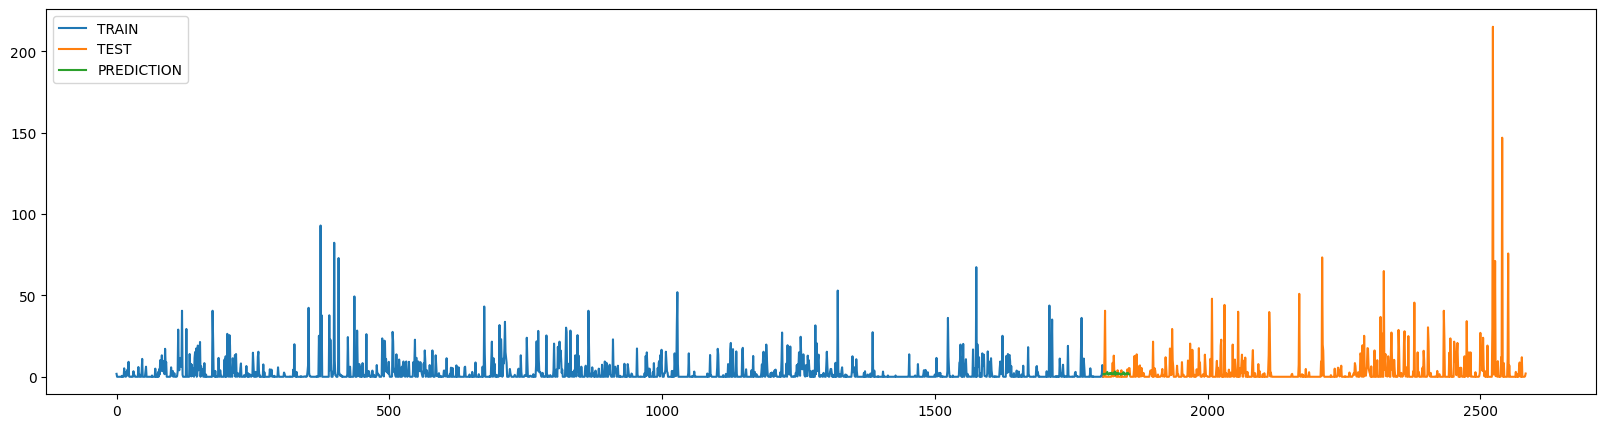

In [ ]:
train_data['Rain(mm)'].plot(legend=True, label='TRAIN', figsize=(20,5))
test_data['Rain(mm)'].plot(legend=True, label='TEST')
test_prediction_rain.plot(legend=True, label='PREDICTION')

<Axes: >

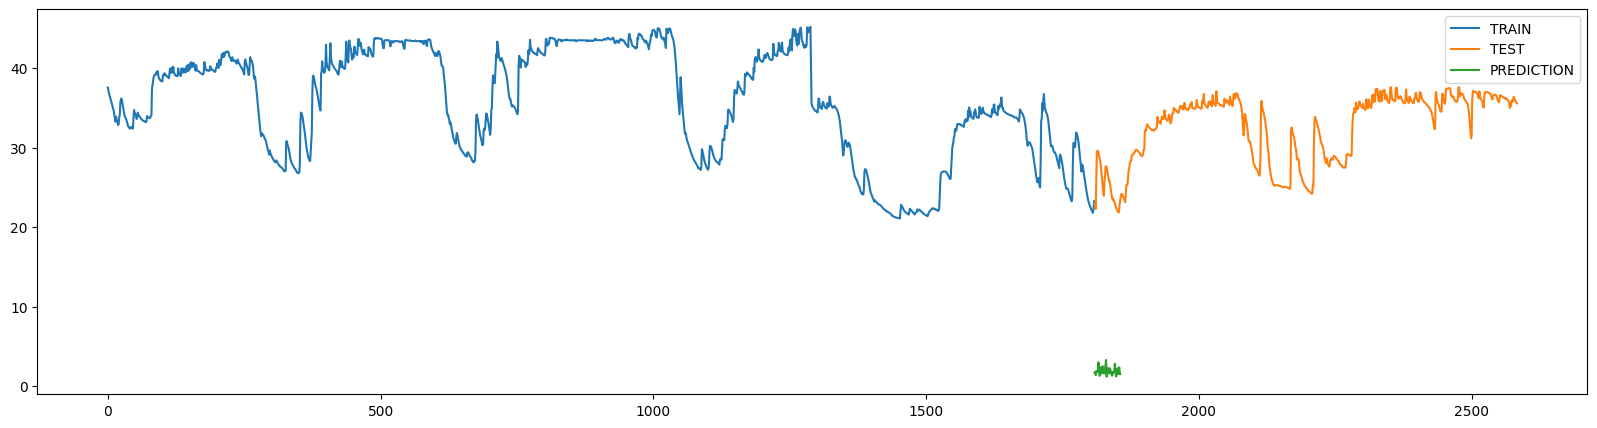

In [ ]:
train_data['SoilMoist(%)'].plot(legend=True, label='TRAIN', figsize=(20,5))
test_data['SoilMoist(%)'].plot(legend=True, label='TEST')
test_prediction_rain.plot(legend=True, label='PREDICTION')

In [ ]:
test_data.describe()

,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),Tmax(c),...,Tgmin(C),ET10©,ET20©,ET100©,Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg,SoilMoist(%)
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,...,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,179.318710,2.436645,156.288387,9.637290,247.747742,4.002839,16.330323,14.646581,82.992258,20.827355,...,10.016129,17.392387,17.481935,18.020516,1016.261161,1014.344903,6.414581,14.289032,16.666258,32.580572
std,102.691847,1.703659,101.593510,8.127361,114.929559,12.635578,3.750755,3.493343,11.572039,3.642493,...,4.862894,4.017582,3.587962,2.671334,8.375037,8.354638,3.776441,7.335649,3.754221,4.296541
min,0.000000,0.000000,2.000000,-175.700000,9.000000,0.000000,3.800000,3.700000,53.000000,11.600000,...,-4.400000,7.100000,9.500000,13.400000,978.400000,976.600000,0.000000,1.160000,6.750000,21.829167
25%,86.000000,1.100000,53.000000,7.700000,164.500000,0.000000,13.700000,12.300000,74.000000,17.700000,...,6.500000,14.050000,14.400000,15.500000,1010.950000,1009.050000,3.500000,8.550000,13.800000,29.000000
50%,178.000000,2.100000,172.000000,9.300000,220.000000,0.000000,16.500000,14.800000,84.000000,20.900000,...,10.000000,17.900000,17.800000,18.300000,1016.300000,1014.400000,6.700000,13.110000,16.800000,34.829167
75%,257.500000,3.500000,236.500000,11.800000,313.000000,2.600000,19.300000,17.300000,93.000000,23.950000,...,13.600000,20.900000,20.700000,20.600000,1021.700000,1019.800000,9.300000,20.025000,19.800000,35.902083
max,360.000000,11.400000,360.000000,22.600000,762.000000,215.200000,25.200000,24.000000,100.000000,28.700000,...,21.500000,25.800000,25.100000,22.400000,1038.600000,1036.600000,13.900000,31.930000,25.250000,37.600000


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(test_data['Rain(mm)'], test_prediction_rain)
mean_squared_error(test_data['Rain(mm)'], test_prediction_rain)

ValueError: Found input variables with inconsistent numbers of samples: [775, 48]